In [1]:
import pandas as pd
online=pd.read_csv("OrderData.csv")

C:\Users\bigdata\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
print("There are %d customers in this dataset." %len(pd.unique(online["MemberID"])))
print("There are %d records." %online.shape[0])

There are 190344 customers in this dataset.
There are 502402 records.


In [3]:
online=pd.concat([online.drop("Status",axis=1),pd.get_dummies(online["Status"])],axis=1)
online.head()

,TradesGroupCode,TradesDateTime,ChannelType,ChannelDetail,PaymentType,ShippingType,TsCount,Qty,TotalSalesAmount,TotalPrice,...,TotalCouponDiscount,TotalLoyaltyDiscount,MemberID,Cancel,Fail,Finish,New,Overdue,Return,Shipping
0,TG190926B00185,2019-09-26 01:15:10.297,OfficialECom,MobileWeb,JKOPay,Home,1,1,680,680,...,0,0,JAE7ypAI%2BmBkMAd1REpPJI3zcEQBI9WBTeg5QlsEri4%3D,0,0,1,0,0,0,0
1,TG190926X00450,2019-09-26 21:16:59.167,OfficialECom,iOSApp,JKOPay,FamilyPickup,4,4,2660,2760,...,-100,0,UB%2F0WwXAdW5GhwWmVB036mhSMcUnbK1IA5kXp31h4XQ%3D,0,0,1,0,0,0,0
2,TG190928M00620,2019-09-28 11:31:04.847,OfficialECom,MobileWeb,JKOPay,FamilyPickup,1,1,1016,1280,...,-200,0,rKUVLmkXyUqqVN8zU1UB40kuhBLRok8FvQtDZTGIS00%3D,0,0,1,0,0,0,0
3,TG190928U00383,2019-09-28 18:23:28.130,OfficialECom,iOSApp,JKOPay,FamilyPickup,1,1,1380,1480,...,-100,0,WpUUri%2BOuznMIisbG5ramILffQkqoQr8TPOj0L8lqN8%3D,0,0,1,0,0,0,0
4,TG190929R00721,2019-09-29 15:29:56.730,OfficialECom,MobileWeb,JKOPay,FamilyPickup,1,1,1780,1880,...,-100,0,acrdzjptXw%2FDeckXY4b5R89lYb41BC0H0bEgiTo9Zj8%3D,1,0,0,0,0,0,0


In [6]:
status=online.groupby(["MemberID"]).agg({"Cancel":"sum","Fail":"sum","Finish":"sum","New":"sum","Overdue":"sum","Return":"sum","Shipping":"sum"})
status["All"]=status.sum(axis=1)
status["Cancel"]=status["Cancel"]/status["All"]
status["Finish"]=status["Finish"]/status["All"]
status["Return"]=status["Return"]/status["All"]
status=status[["Cancel","Finish","Return"]]
status.head(20)

,Cancel,Finish,Return
MemberID,,,
%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf909HvCU%3D,0.000000,0.500000,0.500000
%2B%2B2Sw%2FYbIovLROVPDc%2BeVjbEdn6fTeg7niPBE%2FeJJKo%3D,0.000000,0.500000,0.500000
%2B%2B3XVjBiQPLoAXWc7gK%2BTdvTH4J4AmgkeFlB3mmN7YY%3D,0.000000,0.500000,0.000000
%2B%2B44iA8rzzl4lYN3dzParPLqAXetHBSwDFIBUBD%2B%2Bt4%3D,0.000000,0.500000,0.500000
%2B%2B6Xs%2FwHblxbDDDYQ9osx6DMUooacHVpAJvv7KWgf3o%3D,0.000000,1.000000,0.000000
%2B%2B6ZXiIdakH%2B77WllacG4cehkRZkwBnSIX2XvAroTko%3D,0.000000,0.500000,0.500000
%2B%2B6bo8s3RbG5E3%2FFlzz1bg7Q7D3rdOd00L7AXTUHynU%3D,0.000000,0.500000,0.500000
%2B%2B8NpYVoqyjmc8mROiPMlX%2F2J8JlOghaysSF3qbYCVE%3D,0.000000,0.636364,0.363636
%2B%2B8lPULC%2BdY%2F3MWf4kbymzr1cx%2B3Eaktr2fvQHuFH78%3D,0.000000,1.000000,0.000000


In [7]:
status.to_csv("status.csv")

In [8]:
rfm=online[online["Finish"]==1]
rfm.tail()

,TradesGroupCode,TradesDateTime,ChannelType,ChannelDetail,PaymentType,ShippingType,TsCount,Qty,TotalSalesAmount,TotalPrice,...,TotalCouponDiscount,TotalLoyaltyDiscount,MemberID,Cancel,Fail,Finish,New,Overdue,Return,Shipping
502395,TG200430W02184,2020-04-30 20:56:14.560,OfficialECom,iOSApp,CreditCardInstallment,SevenElevenPickup,9,9,3439,3639,...,-200,0,g3C6Lb4UmX%2F70lH5lh3QAYs81jfitBtCSFcmsJ%2B0Rv...,0,0,1,0,0,0,0
502396,TG200430Q00070,2020-04-30 14:02:50.900,OfficialECom,iOSApp,CreditCardInstallment,FamilyPickup,1,1,1380,1580,...,-200,0,Uy6ISxYGE0S0o5tYJ3w3KKV9z9f0mFo9vdVdhsv1Syw%3D,0,0,1,0,0,0,0
502397,TG200430R01188,2020-04-30 15:46:29.217,OfficialECom,iOSApp,CreditCardInstallment,FamilyPickup,1,1,1280,1480,...,-200,0,82O3xXn1CuexbcPVCiSsMeXMrHOhwtm3%2FHD9hSDLolY%3D,0,0,1,0,0,0,0
502398,TG200430W01020,2020-04-30 20:23:24.773,OfficialECom,iOSApp,CreditCardInstallment,SevenElevenPickup,5,5,3876,4640,...,-300,0,qBtkgfUA%2B1NgxYgKJG5ORfGcS%2B0ASNuHQpwgcnKct0...,0,0,1,0,0,0,0
502399,TG200430B00759,2020-04-30 01:55:39.113,OfficialECom,iOSApp,CreditCardInstallment,SevenElevenPickup,3,3,3082,3560,...,-300,0,3Q6K398muw4NH%2B%2BXzX%2FcEKMB32zuY00NUzru38uE...,0,0,1,0,0,0,0


In [9]:
from datetime import timedelta
rfm["TradesDateTime"]=pd.to_datetime(rfm['TradesDateTime'].astype("str").apply(lambda x:x[:19]),format="%Y-%m-%d %H:%M:%S")+timedelta(hours=8)
rfm["TradesDateTime"]=rfm["TradesDateTime"].apply(lambda x:x.date())
rfm.tail()

<ipython-input-9-4501a3a9dd26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm["TradesDateTime"]=pd.to_datetime(rfm['TradesDateTime'].astype("str").apply(lambda x:x[:19]),format="%Y-%m-%d %H:%M:%S")+timedelta(hours=8)
<ipython-input-9-4501a3a9dd26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm["TradesDateTime"]=rfm["TradesDateTime"].apply(lambda x:x.date())


,TradesGroupCode,TradesDateTime,ChannelType,ChannelDetail,PaymentType,ShippingType,TsCount,Qty,TotalSalesAmount,TotalPrice,...,TotalCouponDiscount,TotalLoyaltyDiscount,MemberID,Cancel,Fail,Finish,New,Overdue,Return,Shipping
502395,TG200430W02184,2020-05-01,OfficialECom,iOSApp,CreditCardInstallment,SevenElevenPickup,9,9,3439,3639,...,-200,0,g3C6Lb4UmX%2F70lH5lh3QAYs81jfitBtCSFcmsJ%2B0Rv...,0,0,1,0,0,0,0
502396,TG200430Q00070,2020-04-30,OfficialECom,iOSApp,CreditCardInstallment,FamilyPickup,1,1,1380,1580,...,-200,0,Uy6ISxYGE0S0o5tYJ3w3KKV9z9f0mFo9vdVdhsv1Syw%3D,0,0,1,0,0,0,0
502397,TG200430R01188,2020-04-30,OfficialECom,iOSApp,CreditCardInstallment,FamilyPickup,1,1,1280,1480,...,-200,0,82O3xXn1CuexbcPVCiSsMeXMrHOhwtm3%2FHD9hSDLolY%3D,0,0,1,0,0,0,0
502398,TG200430W01020,2020-05-01,OfficialECom,iOSApp,CreditCardInstallment,SevenElevenPickup,5,5,3876,4640,...,-300,0,qBtkgfUA%2B1NgxYgKJG5ORfGcS%2B0ASNuHQpwgcnKct0...,0,0,1,0,0,0,0
502399,TG200430B00759,2020-04-30,OfficialECom,iOSApp,CreditCardInstallment,SevenElevenPickup,3,3,3082,3560,...,-300,0,3Q6K398muw4NH%2B%2BXzX%2FcEKMB32zuY00NUzru38uE...,0,0,1,0,0,0,0


In [10]:
rfm=pd.DataFrame(rfm.groupby(["MemberID","TradesDateTime"])["TotalSalesAmount"].sum()).reset_index()

In [11]:
from datetime import datetime 
import datetime as dt
snapshot_date = pd.to_datetime(rfm.TradesDateTime).max() + dt.timedelta(days=1)
snapshot_date=datetime.strptime(str(snapshot_date), "%Y-%m-%d %H:%M:%S")
snapshot_date=pd.to_datetime(snapshot_date)
print(snapshot_date)

2020-05-02 00:00:00


In [12]:
rfm = rfm.groupby(['MemberID']).agg({
'TradesDateTime': lambda x: (snapshot_date-pd.to_datetime(x).max()).days,'TotalSalesAmount': 'sum','MemberID':'size'})

# Rename columns for easier interpretation
rfm.rename(columns = {'TradesDateTime': 'Recency'
,'MemberID': 'Frequency',
'TotalSalesAmount': 'MonetaryValue'}, inplace=True)
rfm.head()

,Recency,MonetaryValue,Frequency
MemberID,,,
%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf909HvCU%3D,311,2850,1
%2B%2B2Sw%2FYbIovLROVPDc%2BeVjbEdn6fTeg7niPBE%2FeJJKo%3D,707,1380,1
%2B%2B3XVjBiQPLoAXWc7gK%2BTdvTH4J4AmgkeFlB3mmN7YY%3D,385,3160,1
%2B%2B44iA8rzzl4lYN3dzParPLqAXetHBSwDFIBUBD%2B%2Bt4%3D,240,1900,1
%2B%2B6Xs%2FwHblxbDDDYQ9osx6DMUooacHVpAJvv7KWgf3o%3D,1408,1280,1


In [13]:
rfm.to_csv("rfm.csv")

In [14]:
member=pd.read_csv("MemberData.csv")
member.head()

,RegisterSourceTypeDef,RegisterDateTime,Gender,Birthday,IsAppInstalled,IsEnableEmail,IsEnablePushNotification,IsEnableShortMessage,MemberCardLevel,MemberID,eland_uuid
0,iOSApp,2014-12-27 22:28:04.600,Female,1983-10-19,True,True,True,True,10,b%2Be6RCNYUwTRO%2BnSBeE4H7ySets9zgOaGkqDYItQZS...,NaN
1,NaN,2015-05-29 14:37:20.977,Female,1990-03-13,True,True,True,True,10,%2FL156mdTEuzDIF5ulSFL4mhJdNRGs8haMhCgz%2BSrG9...,NaN
2,NaN,2013-10-23 12:08:51.540,NaN,1900-01-01,True,True,True,True,10,wj5w28khA7PlMGGXYaUHIfTxKhjae8pnB76k46OL%2Bhc%3D,NaN
3,NaN,2015-06-27 21:15:07.690,Female,1977-03-14,True,True,True,True,10,rvJ4K4pF5BYUVUVZnRdcsc0AMlVLX0T2warN0CyPKmU%3D,NaN
4,NaN,2015-06-03 11:04:27.593,Female,1983-01-15,True,True,True,True,10,Oalq5zcQazy%2B%2BnozogEXMbTItDObkJMUPzz4H%2Fn7...,NaN


In [17]:
member_new=pd.merge(member,rfm.reset_index(),how="inner",left_on="MemberID",right_on="MemberID")
member_new.head(50)

,RegisterSourceTypeDef,RegisterDateTime,Gender,Birthday,IsAppInstalled,IsEnableEmail,IsEnablePushNotification,IsEnableShortMessage,MemberCardLevel,MemberID,eland_uuid,Recency,MonetaryValue,Frequency
0,iOSApp,2014-12-27 22:28:04.600,Female,1983-10-19,True,True,True,True,10,b%2Be6RCNYUwTRO%2BnSBeE4H7ySets9zgOaGkqDYItQZS...,NaN,886,6138,3
1,NaN,2013-10-23 12:08:51.540,NaN,1900-01-01,True,True,True,True,10,wj5w28khA7PlMGGXYaUHIfTxKhjae8pnB76k46OL%2Bhc%3D,NaN,2383,87,1
2,iOSApp,2016-01-07 17:09:35.463,Female,1992-03-15,True,True,True,True,10,OmQZ8Kx6iRoCneeGsxdNR8ZCp79U%2FoNZaMwthMGfi2Y%3D,NaN,1541,2199,2
3,Web,2015-10-26 21:35:09.243,Female,1981-06-16,True,True,True,True,10,koEAsczymT5W4nXx7V577osQQSBhDIMv6Jt%2Fv64hRwo%3D,NaN,931,1299,1
4,Web,2015-10-05 21:04:11.247,NaN,1900-01-01,False,True,True,True,10,oS5gPKjc9ZWvRHgi6UA36yZOvjPqjrGUF5ZRVcS7NWA%3D,NaN,1659,2960,2
5,iOSApp,2015-10-17 22:29:02.463,Female,1987-09-13,True,True,True,True,10,4BqjDQMZYgngwZUAKsFqfNDdfM0ilwfXE7D4zVFDCEo%3D,NaN,1649,2370,1
6,iOSApp,2015-11-15 21:54:21.237,Female,1991-06-25,True,True,True,True,10,wuz2oecdr%2BGF12u3i30%2BPg97%2Bkm9sMu%2B9diNBQ...,NaN,159,3079,1
7,AndroidApp,2015-11-21 02:20:04.257,NaN,1980-12-07,True,False,True,True,10,BM9kUESuo5YR7%2BthSWaNDMF9mqAqGnA%2FuAN6xawRIV...,NaN,407,5240,3
8,NaN,2014-04-23 16:08:50.763,NaN,1900-01-01,True,True,True,True,10,dAMKVwma0T9A7CFzcr%2BmSluheVhoXyQboo4shznEAAg%3D,NaN,1466,4755,3
9,NaN,2015-01-27 23:31:46.867,Female,1977-07-29,True,True,True,True,10,PS0q%2FltKsojZWXS4U6qy6KAc5pyI7kdHs%2FGKZEo7YG...,NaN,1894,799,1


In [19]:
member_new["Birthday"]=member_new["Birthday"].apply(lambda x:x.replace("0001-01-01","1900/1/1"))
member_new["Birthday"]=member_new["Birthday"].apply(lambda x:str(1911+int(x[2:4]))+str(x[4:]) if x.split("/")[0][:2]=="00" else x)
member_new=member_new[member_new["Birthday"]!="1900-01-01"]
member_new["Birthday"]=member_new["Birthday"].apply(lambda x:pd.to_datetime(x).year)
member_new["Age"]=2020-member_new["Birthday"]

member_new[["Birthday","Age"]].head(50)


<ipython-input-19-d6f2b9a68088>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_new["Birthday"]=member_new["Birthday"].apply(lambda x:pd.to_datetime(x).year)
<ipython-input-19-d6f2b9a68088>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_new["Age"]=2020-member_new["Birthday"]


,Birthday,Age
0,1983,37
2,1992,28
3,1981,39
5,1987,33
6,1991,29
7,1980,40
9,1977,43
10,2015,5
11,1991,29
12,1992,28


In [20]:
member_new=member_new[member_new["Age"]<80]
member_new=member_new[member_new["Age"]>10]
member_new=member_new[["MemberID","Age"]]
member_new=member_new.set_index("MemberID")
member_new.head()

,Age
MemberID,
b%2Be6RCNYUwTRO%2BnSBeE4H7ySets9zgOaGkqDYItQZS8%3D,37
OmQZ8Kx6iRoCneeGsxdNR8ZCp79U%2FoNZaMwthMGfi2Y%3D,28
koEAsczymT5W4nXx7V577osQQSBhDIMv6Jt%2Fv64hRwo%3D,39
4BqjDQMZYgngwZUAKsFqfNDdfM0ilwfXE7D4zVFDCEo%3D,33
wuz2oecdr%2BGF12u3i30%2BPg97%2Bkm9sMu%2B9diNBQQGkDk%3D,29


In [21]:
member_new.to_csv("member.csv")

In [1]:
import os
data=os.listdir('123_new')

In [2]:
import datetime
new=[]
for i in data:
    new.append(i.split('_')[0])
btype=list(set(new))
btype.remove("trafficSource")
btype.remove("userRegisteration")
btype

['activityPageView',
 'categoryPageView',
 'mainPageView',
 'purchase',
 'search',
 'productPageView',
 'checkout',
 'addToCart']

In [3]:
categoryPageView=[]
purchase=[]
mainPageView=[]
checkout=[]
productPageView=[]
activityPageView=[]
search=[]
addToCart=[]
for i in data:
    if "categoryPageView" in i:
        categoryPageView.append(i)
    if "purchase" in i:
        purchase.append(i)
    if "mainPageView" in i:
        mainPageView.append(i)
    if "checkout" in i:
        checkout.append(i)
    if "productPageView" in i:
        productPageView.append(i)
    if "search" in i:
        search.append(i)
    if "activityPageView" in i:
        activityPageView.append(i)
    if "addToCart" in i:
        addToCart.append(i)

In [4]:
import pandas as pd
df1=[pd.read_csv(os.path.join("123_new",i)) for i in categoryPageView]
df2=[pd.read_csv(os.path.join("123_new",i)) for i in purchase]
df3=[pd.read_csv(os.path.join("123_new",i)) for i in mainPageView]
df4=[pd.read_csv(os.path.join("123_new",i)) for i in checkout]
df5=[pd.read_csv(os.path.join("123_new",i)) for i in productPageView]
df6=[pd.read_csv(os.path.join("123_new",i)) for i in search]
df7=[pd.read_csv(os.path.join("123_new",i)) for i in activityPageView]
df8=[pd.read_csv(os.path.join("123_new",i)) for i in addToCart]

In [9]:
df_big=pd.concat([pd.concat(df1,axis=0),pd.concat(df2,axis=0),pd.concat(df3,axis=0),pd.concat(df4,axis=0),pd.concat(df5,axis=0),pd.concat(df6,axis=0),pd.concat(df7,axis=0),pd.concat(df8,axis=0)],axis=0)
df_big.dropna(subset=["uid"],inplace=True)
df_big["ht"]=df_big["ht"].apply(lambda x:datetime.datetime.fromtimestamp(int(x) / 1000).strftime("%Y-%m-%d %H:%M:%S"))
df_big.head()

,mid,dc,did,uid,ht,ul,geoid,bh,pr,tr,ti,pr1id,pr1pr,pr1qt,cu
6761,123,app,d84d383c-73a7-4e52-9d64-84be6c82d5ab,%2F22YvMGkuoyR6zvEYk5QSFFPOg3sC68W3EmMBrG371E%3D,2018-06-26 14:23:26,zh-TW,TW,viewcategory,0,NaN,NaN,NaN,NaN,NaN,NaN
6762,123,app,1b5f5c14-4e93-47f9-ba22-f3ee7ad219f3,10MHwLF4klza7WmvaoBut%2F6yK5ujMxJiqt70aO61AKM%3D,2018-06-26 23:54:13,zh-Hant,TW,viewcategory,25973,NaN,NaN,NaN,NaN,NaN,NaN
6763,123,web,0e960ea3-0c10-489d-494b-f82e6da5ff6f,YP4rsCTcLZMhO8CXsQDoB5KonLHEM6km1ycEBT9Hxtw%3D,2018-06-26 18:05:11,zh-tw,TW,viewcategory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6764,123,web,0e960ea3-0c10-489d-494b-f82e6da5ff6f,YP4rsCTcLZMhO8CXsQDoB5KonLHEM6km1ycEBT9Hxtw%3D,2018-06-26 17:58:58,zh-tw,TW,viewcategory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6765,123,web,0e960ea3-0c10-489d-494b-f82e6da5ff6f,YP4rsCTcLZMhO8CXsQDoB5KonLHEM6km1ycEBT9Hxtw%3D,2018-06-26 18:08:10,zh-tw,TW,viewcategory,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print(df_big.shape)

(16362330, 15)


In [11]:
#datetime.datetime.fromtimestamp(int("1530671511458") / 1000).strftime("%Y-%m-%d %H:%M:%S")

In [13]:
#df_big[df_big["uid"]=="%2B%2BP3hhogUcwlFXNq%2FN%2F%2BF9UFR%2BXcIHzrhS82Nu5PqD8%3D"].to_csv("temp.csv")

In [16]:
len(pd.unique(df_big["uid"]))

173906

In [19]:
#for i in pd.unique(df_big["uid"]):
 #   df_big[df_big["uid"]==i].to_csv("behavior/"+str(i)+".csv")

In [2]:
import pandas as pd
test=pd.read_csv("C://Users//bigdata//Desktop//91ForNTUDataSet//91ForNTUDataSet//behavior//5a9EEkCbZ2B9UlzjRqgBjR8DMSfFPPFLKfYkz8dz8a4%3D.csv")
test.head()

,Unnamed: 0,mid,dc,did,uid,ht,ul,geoid,bh,pr,tr,ti,pr1id,pr1pr,pr1qt,cu
0,6863,123,web,4a923839-abdd-4660-2b0a-4537ae507abe,5a9EEkCbZ2B9UlzjRqgBjR8DMSfFPPFLKfYkz8dz8a4%3D,2018-06-26 14:00:55,zh-tw,TW,viewcategory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6548,123,web,4a923839-abdd-4660-2b0a-4537ae507abe,5a9EEkCbZ2B9UlzjRqgBjR8DMSfFPPFLKfYkz8dz8a4%3D,2018-07-29 20:17:31,zh-tw,TW,viewcategory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6549,123,web,4a923839-abdd-4660-2b0a-4537ae507abe,5a9EEkCbZ2B9UlzjRqgBjR8DMSfFPPFLKfYkz8dz8a4%3D,2018-07-29 20:17:04,zh-tw,TW,viewcategory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6550,123,web,4a923839-abdd-4660-2b0a-4537ae507abe,5a9EEkCbZ2B9UlzjRqgBjR8DMSfFPPFLKfYkz8dz8a4%3D,2018-07-29 20:18:00,zh-tw,TW,viewcategory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6333,123,web,4a923839-abdd-4660-2b0a-4537ae507abe,5a9EEkCbZ2B9UlzjRqgBjR8DMSfFPPFLKfYkz8dz8a4%3D,2018-08-21 17:10:15,zh-tw,TW,viewcategory,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import datetime as dt
test["ht"]=test["ht"].apply(lambda x:pd.to_datetime(x))
test["time"]=test["ht"].apply(lambda x:x.time())
test["hour"]=test["ht"].apply(lambda x:x.hour)
test["date"]=test["ht"].apply(lambda x:str(pd.to_datetime(x).date()))

In [4]:
pd.unique(test[test["bh"]=="purchase"]["date"])

array(['2018-11-11', '2019-05-04'], dtype=object)

In [18]:
think=test[(test["bh"]=="viewcategory") & (test["date"]=='2018-11-11')].sort_values("ht")
buy=test[(test["bh"]=="purchase") & (test["date"]=='2018-11-11')].sort_values("ht")

think=think.append(buy.iloc[buy.shape[0]-1])


In [19]:
think=think[["ht","hour"]]
think=think.groupby("hour").agg({"ht":["min","max"]})
think

ht                    
                     min                 max
hour                                        
17   2018-11-11 17:56:39 2018-11-11 17:59:36
21   2018-11-11 21:07:39 2018-11-11 21:11:35
22   2018-11-11 22:52:05 2018-11-11 22:59:25
23   2018-11-11 23:02:01 2018-11-11 23:45:54

In [20]:
think=pd.DataFrame(list(think[("ht","min")].values)+list(think[("ht","max")].values))
think=think.sort_values(0)
think["diff"]=think[0]-think[0].shift()
think

,0,diff
0,2018-11-11 17:56:39,NaT
4,2018-11-11 17:59:36,00:02:57
1,2018-11-11 21:07:39,03:08:03
5,2018-11-11 21:11:35,00:03:56
2,2018-11-11 22:52:05,01:40:30
6,2018-11-11 22:59:25,00:07:20
3,2018-11-11 23:02:01,00:02:36
7,2018-11-11 23:45:54,00:43:53


In [21]:
think=think[think["diff"]<=dt.timedelta(hours=1)]
round(think["diff"].sum().total_seconds()/60,1)

60.7

In [1]:
import os
len(os.listdir("behavior"))
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
behavior=dict()
bh=["viewactivity","viewcategory","viewmainpage","viewproduct","search"]
for i in os.listdir("behavior"):
    temp=pd.read_csv(os.path.join("behavior",i))
    i=i.split(".")[0]
    if "purchase" in temp["bh"].values:
        behavior[i]=[0]*5
        temp["ht"]=temp["ht"].apply(lambda x:pd.to_datetime(x))
        temp["time"]=temp["ht"].apply(lambda x:x.time())
        temp["hour"]=temp["ht"].apply(lambda x:x.hour)
        temp["date"]=temp["ht"].apply(lambda x:str(pd.to_datetime(x).date()))
        for j in range(len(bh)):
            count=0
            value=0
            for k in pd.unique(temp[temp["bh"]=="purchase"]["date"]):
                think=temp[(temp["bh"]==bh[j]) & (temp["date"]==k)].sort_values("ht")
                buy=temp[(temp["bh"]=="purchase") & (temp["date"]==k)].sort_values("ht")
                think=think.append(buy.iloc[buy.shape[0]-1])
                if think.shape[0]>1:
                    count+=1
                    think=think[["ht","hour"]]
                    think=think.groupby("hour").agg({"ht":["min","max"]})
                    think=pd.DataFrame(list(think[("ht","min")].values)+list(think[("ht","max")].values))
                    think=think.sort_values(0)
                    think["diff"]=think[0]-think[0].shift()
                    think=think[think["diff"]<=dt.timedelta(hours=1)]
                    value+=round(think["diff"].sum().total_seconds()/60,1)
            if count>0:
                value/=count
                behavior[i][j]=value
            else:
                behavior[i][j]=0
    else:
        pass

C:\Users\bigdata\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\bigdata\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
import numpy as np
temp=pd.DataFrame(behavior.items())
temp.columns=["MemberID","temp"]
temp["viewactivity"]=temp["temp"].apply(lambda x:x[0])
temp["viewcategory"]=temp["temp"].apply(lambda x:x[1])
temp["viewmainpage"]=temp["temp"].apply(lambda x:x[2])
temp["viewproduct"]=temp["temp"].apply(lambda x:x[3])
temp["search"]=temp["temp"].apply(lambda x:x[4])
temp.drop("temp",axis=1,inplace=True)
temp.head(30)

,MemberID,viewactivity,viewcategory,viewmainpage,viewproduct,search
0,%2B%2B3XVjBiQPLoAXWc7gK%2BTdvTH4J4AmgkeFlB3mmN...,0.0,2.500000,0.000000,9.50,0.0
1,%2B%2B44iA8rzzl4lYN3dzParPLqAXetHBSwDFIBUBD%2B...,0.0,7.600000,71.100000,73.40,0.0
2,%2B%2B8lPULC%2BdY%2F3MWf4kbymzr1cx%2B3Eaktr2fv...,0.0,20.100000,20.500000,18.90,0.0
3,%2B%2B8NpYVoqyjmc8mROiPMlX%2F2J8JlOghaysSF3qbY...,0.0,0.000000,34.400000,33.60,0.0
4,%2B%2BciclPmW8BW4lP3bLm6163xTwiLZ%2F%2FWU4cHY2...,0.0,10.300000,0.400000,4.80,0.0
5,%2B%2BHVWUHpauba4avsH6qa1JN3VITlhErA3GLSgNEq5S...,0.0,3.900000,4.200000,7.50,0.0
6,%2B%2BIQh8016M2jdnkz6608gbhHjiXKrXmUoN68bJz09m...,0.0,0.000000,6.400000,0.00,0.0
7,%2B%2Bku%2FHD%2FFfRbMIIG7QfAajpsPJXdr1XuwGsdIU...,0.0,0.600000,2.100000,0.00,0.0
8,%2B%2BKWWfO7UJQhmQXfJHoERSh2Ha4XnWrMJRMdMhB3xI...,0.0,16.100000,0.600000,15.30,0.0
9,%2B%2BLF8KhHcEi0FHyrHxgTk2aaGagL9vgr9gJKz7AD68...,0.0,0.000000,0.000000,6.50,0.0


In [97]:
temp.to_csv("behavior.csv")

In [98]:
behavior=pd.read_csv("behavior.csv")
behavior.drop("Unnamed: 0",axis=1,inplace=True)
behavior.head()

,MemberID,viewactivity,viewcategory,viewmainpage,viewproduct,search
0,%2B%2B3XVjBiQPLoAXWc7gK%2BTdvTH4J4AmgkeFlB3mmN...,0.0,2.5,0.0,9.5,0.0
1,%2B%2B44iA8rzzl4lYN3dzParPLqAXetHBSwDFIBUBD%2B...,0.0,7.6,71.1,73.4,0.0
2,%2B%2B8lPULC%2BdY%2F3MWf4kbymzr1cx%2B3Eaktr2fv...,0.0,20.1,20.5,18.9,0.0
3,%2B%2B8NpYVoqyjmc8mROiPMlX%2F2J8JlOghaysSF3qbY...,0.0,0.0,34.4,33.6,0.0
4,%2B%2BciclPmW8BW4lP3bLm6163xTwiLZ%2F%2FWU4cHY2...,0.0,10.3,0.4,4.8,0.0


In [99]:
rfm=pd.read_csv("rfm.csv")
member=pd.read_csv("member.csv")
status=pd.read_csv("status.csv")

In [100]:
rfm.head()

,MemberID,Recency,MonetaryValue,Frequency
0,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,311,2850,1
1,%2B%2B2Sw%2FYbIovLROVPDc%2BeVjbEdn6fTeg7niPBE%...,707,1380,1
2,%2B%2B3XVjBiQPLoAXWc7gK%2BTdvTH4J4AmgkeFlB3mmN...,385,3160,1
3,%2B%2B44iA8rzzl4lYN3dzParPLqAXetHBSwDFIBUBD%2B...,240,1900,1
4,%2B%2B6Xs%2FwHblxbDDDYQ9osx6DMUooacHVpAJvv7KWg...,1408,1280,1


In [101]:
rfm=pd.merge(rfm,member,on="MemberID",how="left")
rfm.head()

,MemberID,Recency,MonetaryValue,Frequency,Age
0,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,311,2850,1,47.0
1,%2B%2B2Sw%2FYbIovLROVPDc%2BeVjbEdn6fTeg7niPBE%...,707,1380,1,49.0
2,%2B%2B3XVjBiQPLoAXWc7gK%2BTdvTH4J4AmgkeFlB3mmN...,385,3160,1,38.0
3,%2B%2B44iA8rzzl4lYN3dzParPLqAXetHBSwDFIBUBD%2B...,240,1900,1,24.0
4,%2B%2B6Xs%2FwHblxbDDDYQ9osx6DMUooacHVpAJvv7KWg...,1408,1280,1,42.0


In [102]:
rfm=pd.merge(rfm,status,on="MemberID",how="left")
feature=pd.merge(rfm,behavior,on="MemberID",how="left")
feature.head()

,MemberID,Recency,MonetaryValue,Frequency,Age,Cancel,Finish,Return,viewactivity,viewcategory,viewmainpage,viewproduct,search
0,%2B%2B%2FsALKlNdkh585nb%2F9geIrN84FIZZLkD8qf90...,311,2850,1,47.0,0.0,0.5,0.5,NaN,NaN,NaN,NaN,NaN
1,%2B%2B2Sw%2FYbIovLROVPDc%2BeVjbEdn6fTeg7niPBE%...,707,1380,1,49.0,0.0,0.5,0.5,NaN,NaN,NaN,NaN,NaN
2,%2B%2B3XVjBiQPLoAXWc7gK%2BTdvTH4J4AmgkeFlB3mmN...,385,3160,1,38.0,0.0,0.5,0.0,0.0,2.5,0.0,9.5,0.0
3,%2B%2B44iA8rzzl4lYN3dzParPLqAXetHBSwDFIBUBD%2B...,240,1900,1,24.0,0.0,0.5,0.5,0.0,7.6,71.1,73.4,0.0
4,%2B%2B6Xs%2FwHblxbDDDYQ9osx6DMUooacHVpAJvv7KWg...,1408,1280,1,42.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [103]:
print(feature.shape)
feature.isnull().sum()

(186630, 13)


MemberID              0
Recency               0
MonetaryValue         0
Frequency             0
Age               78211
Cancel                0
Finish                0
Return                0
viewactivity     118552
viewcategory     118552
viewmainpage     118552
viewproduct      118552
search           118552
dtype: int64

In [104]:
feature=feature[feature["Frequency"]>=3]
feature.shape

(33914, 13)

In [105]:
#feature.isnull().sum()

In [106]:
feature=feature.dropna()
print(feature.shape)

(18049, 13)


In [107]:
X=feature.copy()
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler() 
X.iloc[:,1:] = scaler.fit_transform(X.iloc[:,1:].to_numpy())
X.head()

,MemberID,Recency,MonetaryValue,Frequency,Age,Cancel,Finish,Return,viewactivity,viewcategory,viewmainpage,viewproduct,search
7,%2B%2B8NpYVoqyjmc8mROiPMlX%2F2J8JlOghaysSF3qbY...,1.534369,-0.013440,-0.078537,-0.856708,-0.559102,-0.722030,1.515025,-0.351258,-0.943150,0.527522,0.372013,-0.379718
15,%2B%2BNDzORK22Pw4JL39ljTf3PC0%2BIt5bhEcTIo8nVX...,0.036604,-0.557057,-0.563708,-2.284027,-0.559102,1.347306,-0.988723,-0.351258,-0.555028,-0.526490,-0.743361,-0.379718
17,%2B%2BP3hhogUcwlFXNq%2FN%2F%2BF9UFR%2BXcIHzrhS...,-0.709555,0.570293,0.568358,1.997930,-0.559102,0.127876,0.486700,-0.351258,-0.595883,-0.646948,-0.745393,-0.379718
62,%2B%2FNuzdtrTrEx3VKUnR1M8KoA9URjgaTv7dnFxVpuop...,2.416688,-0.581223,-0.563708,-1.284903,-0.559102,-0.075363,0.732604,0.518247,-0.376287,-0.199531,-0.310620,-0.379718
64,%2B%2FSRSc7hd1Af%2BY7YZALb41Ju%2BH3bnp3bU1LvT8...,0.199996,-0.569261,-0.563708,0.142416,-0.559102,1.347306,-0.988723,-0.351258,-0.943150,-0.817598,-0.960747,-0.379718


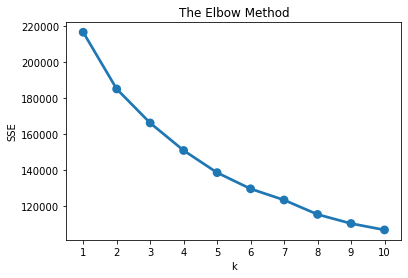

In [108]:
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X.drop("MemberID",axis=1))
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster cente
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [109]:
import numpy as np
wcss = sse
distances = []
for i in range(1,11):
    p1 = np.array([1,wcss[1]])
    p2 = np.array([10,wcss[10]])
    p = np.array([i,wcss[i]])
    distances.append(np.abs(np.cross(p2-p1,p-p1))/np.linalg.norm(p2-p1))
print(list(wcss.keys())[np.argmax(distances)])

5


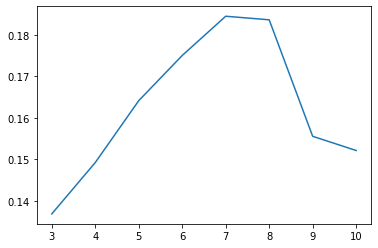

In [111]:
from sklearn.metrics import silhouette_score
silhouette_avg = []
for i in range(3,11):
    kmeans_fit = KMeans(n_clusters = i).fit(X.drop("MemberID",axis=1))
    silhouette_avg.append(silhouette_score(X.drop("MemberID",axis=1), kmeans_fit.labels_))
plt.plot(range(3,11), silhouette_avg)

In [184]:
kmeans = KMeans(n_clusters=7, random_state=1)
kmeans.fit(X.drop("MemberID",axis=1))
cluster_labels = kmeans.labels_
feature = feature.assign(Cluster = cluster_labels)

In [185]:
final=feature.groupby(['Cluster']).agg({'Recency': 'median','Frequency': 'median','MonetaryValue': ['median','count'],'Age':"mean","Cancel":"median","Finish":"median","Return":"median","search":"mean","viewactivity":"mean","viewcategory":"mean","viewmainpage":"mean","viewproduct":"mean"}).round(1)

In [186]:
final=final.reset_index()
final

Cluster Recency Frequency MonetaryValue         Age Cancel Finish Return  \
           median    median        median count  mean median median median   
0       0     179         4        7792.0  5378  34.6    0.0    1.0    0.0   
1       1     108         4       10416.0  1803  34.5    0.0    0.8    0.2   
2       2      32        13       28305.5  2048  34.6    0.0    0.7    0.2   
3       3     183         4        8100.0  5229  33.0    0.0    0.7    0.3   
4       4     170         4        8135.0  2471  33.8    0.2    0.7    0.0   
5       5       5        32       87842.0   296  37.2    0.0    0.7    0.1   
6       6      83         5       10894.5   824  33.0    0.0    0.8    0.1   

  search viewactivity viewcategory viewmainpage viewproduct  
    mean         mean         mean         mean        mean  
0    1.7          1.8         13.3         14.9        16.7  
1    2.8         13.3         53.9         60.9        70.2  
2    4.2          3.9         19.4         24.1        23.9  
3    1.2          1.3         10.5         13.6        14.6  
4    2.2          2.1         15.0         18.4        19.9  
5    9.2         11.7         29.2         37.6        37.5  
6   40.6          5.0         30.0         40.1        47.0

In [187]:
#final.columns

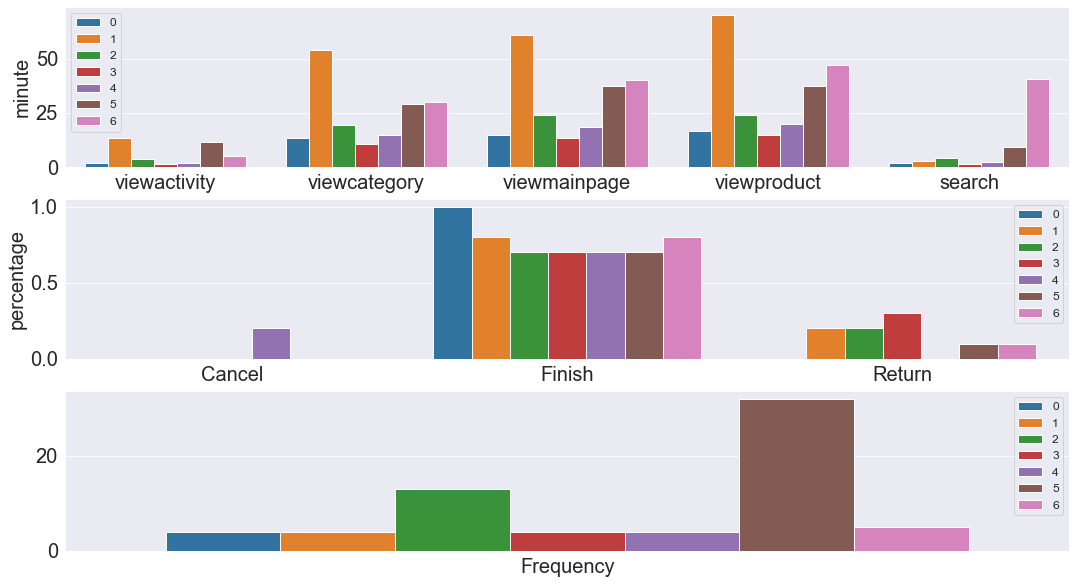

In [188]:
fig, ax = plt.subplots(3,1, figsize=(18,10))

import seaborn as sns
sns.set_style('darkgrid')

tidy0=final[[( 'viewactivity','mean'),( 'viewcategory', 'mean'),( 'viewmainpage','mean'),( 'viewproduct', 'mean'),( 'search', 'mean'),( 'Cluster', '')]].melt(id_vars='Cluster').rename(columns=str.title)


sns.barplot(x="Variable_0",y="Value",data=tidy0,hue="Cluster", ax=ax[0])


tidy1=final[[('Cancel', 'median'),('Finish', 'median'),('Return', 'median'),( 'Cluster', '')]].melt(id_vars='Cluster').rename(columns=str.title)

sns.barplot(x="Variable_0",y="Value",data=tidy1,hue="Cluster", ax=ax[1])

tidy2=final[[('Frequency', 'median'),( 'Cluster', '')]].melt(id_vars='Cluster').rename(columns=str.title)

sns.barplot(x="Variable_0",y="Value",data=tidy2,hue="Cluster", ax=ax[2])


ax[0].set_xlabel ('', fontsize=20)
ax[0].set_ylabel ('minute', fontsize=20)
ax[0].tick_params(labelsize=20)
ax[0].legend(prop=dict(size=12))


ax[1].set_xlabel('', fontsize=20)
ax[1].set_ylabel ('percentage', fontsize=20)
ax[1].tick_params(labelsize=20)
ax[1].legend(prop=dict(size=12))

ax[2].set_xlabel('', fontsize=20)
ax[2].set_ylabel ('', fontsize=20)
ax[2].tick_params(labelsize=20)
ax[2].legend(prop=dict(size=12))


In [199]:
from sklearn.decomposition import TruncatedSVD
X=feature[feature.columns[1:-1]]
scaler = StandardScaler()
X=scaler.fit_transform(X)
svd = TruncatedSVD(n_components=2)
X=svd.fit_transform(X)
X=pd.DataFrame(X)
X["Cluster"]=feature["Cluster"].values
X.head()

,0,1,Cluster
0,-0.476225,0.083386,3
1,-1.734758,-0.543667,0
2,-0.494692,1.473679,2
3,-1.349547,-0.773406,3
4,-2.088988,-0.245737,0


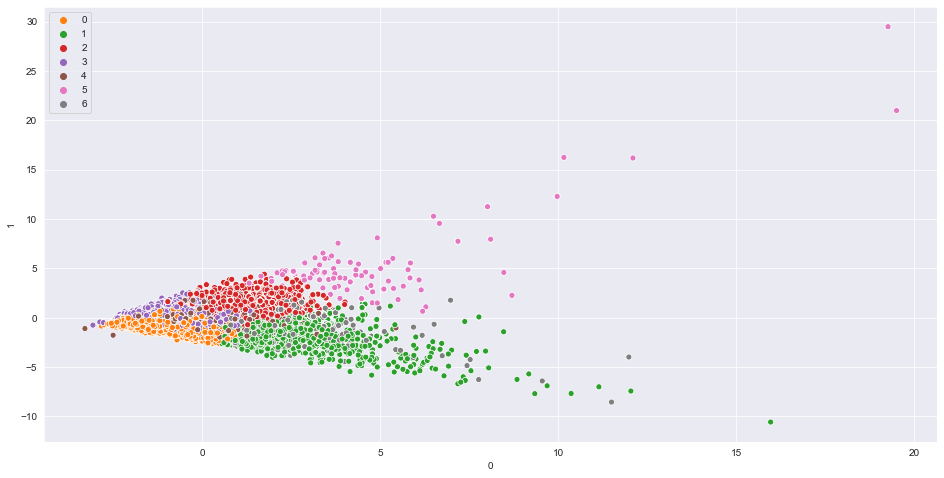

In [205]:
palette ={0:"C1",1:"C2",2:"C3",3:"C4",4:"C5",5:"C6",6:"C7"}
fig, ax = plt.subplots(1,1, figsize=(16,8))
sns.scatterplot(x=0, y=1, data=X, hue=X['Cluster'].tolist(), palette=palette)